In [30]:
import tweepy
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style

user = []
store_handle = []
search_counter = 0
user_counter = 0


#Report Current Time
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [31]:

#Search for mention
bot_reference = "@pan_bot Analyze:"
mention = api.search(bot_reference)

for tweet in mention["statuses"]:
    parse_info = tweet["text"].split("Analyze:")
    if parse_info[1] not in store_handle:
        store_handle.append(parse_info[1])
        user.append(tweet["user"]["screen_name"])
    print(user[search_counter])
    print(store_handle[search_counter])
    search_counter +=1


NB_ED4ever
@CO2_Dispenser
NB_ED4ever
@sherryjystad5
CO2_Dispenser
@WSJ
NB_ED4ever
@mr_bryan_lowe
NB_ED4ever
@PlayOverwatch


In [32]:
news_sentiments = {
    "Target": [],
    "Compound Score":[],
    "Positive Score":[],
    "Negative Score":[],
    "Neutral Score":[],
    "Tweet Ago":[],
    "Tweet Time":[]
    }
counter = 0
oldest_tweet= None


for x in store_handle:
    counter = 0
    oldest_tweet= None
    for u in range(5):
        public_tweets = api.search(x, count=100, result_type= "recent",max_id = oldest_tweet)

        for tweet in public_tweets["statuses"]:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            time = tweet["created_at"]
            tweet_datetime = datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y")

            # Add each value to the appropriate array
            news_sentiments["Target"].append(x)
            news_sentiments["Positive Score"].append(pos)
            news_sentiments["Negative Score"].append(neg)
            news_sentiments["Neutral Score"].append(neu)
            news_sentiments["Compound Score"].append(compound)
            news_sentiments["Tweet Ago"].append(counter)
            news_sentiments["Tweet Time"].append(tweet_datetime)

            oldest_tweet = tweet["id"]-1

            counter-=1



In [33]:
news_sent_df = pd.DataFrame(news_sentiments)

In [34]:
news_sent_df.head()

,Target,Compound Score,Positive Score,Negative Score,Neutral Score,Tweet Ago,Tweet Time
0,@CO2_Dispenser,0.0,0.0,0.0,1.0,0,2018-10-02 18:48:42+00:00
1,@CO2_Dispenser,0.0,0.0,0.0,1.0,-1,2018-10-02 18:42:42+00:00
2,@CO2_Dispenser,0.0,0.0,0.0,1.0,-2,2018-10-02 03:16:14+00:00
3,@CO2_Dispenser,0.0,0.0,0.0,1.0,-3,2018-10-02 02:36:16+00:00
4,@sherryjystad5,0.0,0.0,0.0,1.0,0,2018-10-02 18:48:42+00:00


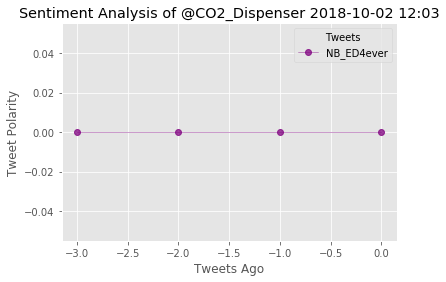

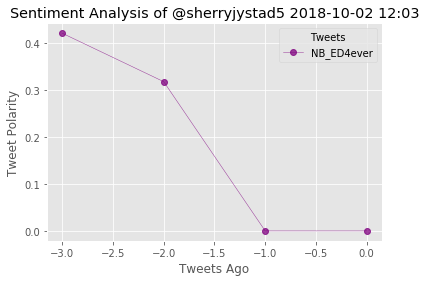

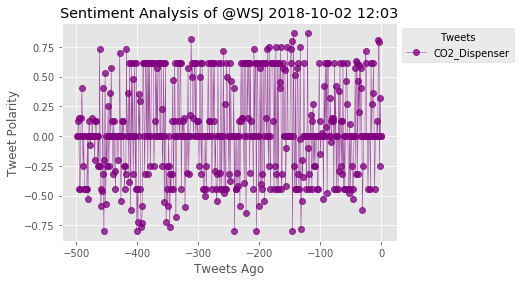

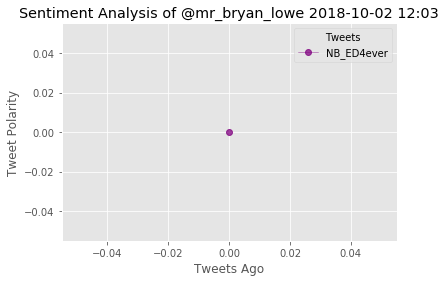

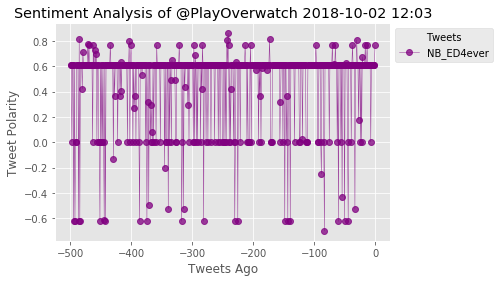

In [35]:


for x in store_handle:
    filter_target = news_sent_df.loc[news_sent_df["Target"]==x]

    #Collecting Scatterplot information
    compound_score = filter_target["Compound Score"]
    tweet_ago = filter_target["Tweet Ago"]
    plt.plot(tweet_ago, compound_score,color = "purple", marker ="o", label =user[user_counter], alpha = 0.75, linewidth = 0.5)

    #Some asthetic work for the Graph
    plt.legend(bbox_to_anchor=(1,1), title = "Tweets")
    plt.title(f"Sentiment Analysis of {store_handle[user_counter]} {now}")
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    style.use("ggplot")
    plt.grid(color="white")
    plt.savefig(f"Pics/{store_handle[user_counter]}pic.png")
    plt.show()
    api.update_with_media(f"Pics/{store_handle[user_counter]}pic.png",f"@{user[user_counter]}, see your results!" )
    user_counter +=1